In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [115]:
df=pd.read_csv("D:/User/Data_science/datasets/Chennai houseing sale.csv")

In [116]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [117]:
df.shape

(7109, 22)

In [118]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [119]:
# df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
# df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [120]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [121]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [122]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean',fill_value=None)

In [123]:
df['N_BEDROOM']=si.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM']=si.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL']=si.fit_transform(df[['QS_OVERALL']])

In [124]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [125]:
col=df.columns
col

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [126]:
for cl in col:
    if (df[cl].dtype == 'object'):
        print(cl,df[cl].nunique())
        print()

PRT_ID 7109

AREA 17

DATE_SALE 2798

SALE_COND 9

PARK_FACIL 3

DATE_BUILD 5808

BUILDTYPE 5

UTILITY_AVAIL 5

STREET 5

MZZONE 6



In [127]:
for cl in col:
    if (df[cl].dtype == 'object') and df[cl].nunique() < 20:
        print(cl,df[cl].unique())
        print()


AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL ['Yes' 'No' 'Noo']

BUILDTYPE ['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']



In [128]:
df['AREA'].replace({"Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","KKNagar":"KK Nagar","Chrompt":"Chormpet","Chrmpet":"Chormpet","Karapakam":"Karapakkam","T Nagar":"TNagar","Velchery":"Velachery","Adyr":"Adyar","Chrompet":"Chormpet"},inplace=True)
df['SALE_COND'].replace({"AbNormal":"Abnormal","Ab Normal":"Abnormal","PartiaLl":"Partial","Partiall":"Partial","Adj Land":"AdjLand"},inplace=True)
df['PARK_FACIL'].replace('Noo','No',inplace=True)
df['BUILDTYPE'].replace({"Comercial":"Commercial","Others":"Other"},inplace=True)
df['UTILITY_AVAIL'].replace({"All Pub":"AllPub","NoSewr":"NoSeWa"},inplace=True)
df['STREET'].replace({"Pavd":"Paved","No Access":"NoAccess"},inplace=True)

In [129]:
for cl in col:
    if (df[cl].dtype == 'object') and df[cl].nunique() < 20:
        print(cl,df[cl].unique())
        print()

AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chormpet' 'KK Nagar'
 'TNagar']

SALE_COND ['Abnormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']

PARK_FACIL ['Yes' 'No']

BUILDTYPE ['Commercial' 'Other' 'House']

UTILITY_AVAIL ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa']

STREET ['Paved' 'Gravel' 'NoAccess']

MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']



In [130]:
for cl in col:
    if (df[cl].dtype != 'object'):
        print(cl,df[cl].dtype)
        print()

INT_SQFT int64

DIST_MAINROAD int64

N_BEDROOM float64

N_BATHROOM float64

N_ROOM int64

QS_ROOMS float64

QS_BATHROOM float64

QS_BEDROOM float64

QS_OVERALL float64

REG_FEE int64

COMMIS int64

SALES_PRICE int64



In [131]:
#Changing the datatype from float to int
df.QS_ROOMS=df.QS_ROOMS.astype(int)
df.QS_BATHROOM=df.QS_BATHROOM.astype(int)
df.QS_BEDROOM=df.QS_BEDROOM.astype(int)
df.N_BEDROOM=df.N_BEDROOM.astype(int)
df.N_BATHROOM=df.N_BATHROOM.astype(int)

In [132]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int32
N_BATHROOM         int32
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS           int32
QS_BATHROOM        int32
QS_BEDROOM         int32
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [133]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7109.000000  7109.000000  7109.000000   
mean   1382.073006      99.603179     1.636939     1.213110     3.688704   
std     457.410902      57.403110     0.802881     0.409534     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7109.000000    7109.000000   
mean      3.075538     3.069349     3.056126     3.503254  376938.330708   
std       0.872937     0.876024     0.871499     0.525440  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.000000     2.000000     2.000000     3.130000  272406.000000   
50%       3.000000     3.000000     3.000000     3.503254  349486.000000   
75%       4.000000     4.000000     4.000000     3.880000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [134]:
df['AREA'].value_counts()

Chormpet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

### Count of houses in different areas in Chennai

1. Chormpet Area Has Maximum Houses when compared to Others
2. TNagar Area has less Houses in Chennai

In [135]:
px.pie(df.groupby('AREA',as_index=False)['PRT_ID'].count(),values='PRT_ID',names='AREA',labels={'PRT_ID':'Count'},template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma,hole=.5,title='<b> House Count in different Areas of Chennai</b>')

### How the Sales Price of houses varies with Different Areas in Chennai ?
1. TNagar and anna nagar Area Huses has Maximum Sales Price and KK Nagar Area Houses are second Max Sales Price
2. Karapakam Area Houses has less Sales Price When compared to other area Houses

In [136]:
px.box(df,x='AREA',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b> Sales Price in Different Areas</b>')

#### How the Square Foot of the House will Effect the  Sales Price?
1. Increase in Square Foot of Houses increases the Sales price of Houses
2. As we can see the Houses Related to Same Area  Having Almost Similar Square feet Length
3. T Nagar and Anna Nagar Area Houses has Maximum Price Having Square Foot in the Range of 1500 to 2000
4. KK Nagar Area Houses Has high Square foots from 1400 to 2500

In [137]:
px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA',size='INT_SQFT',labels={'INT_SQFT':'SQFT'},template='plotly_dark',title='<b> SQFT Versus SALES PRICE of Houses in Different Areas')

### How does Sales Price Depends on the Main Road Distance From the House? 
1. It Seems Like MainRoad Distance Does Not Affecting the Sales Price of Houses
2. The Price is same for the Houses having shorter Main Road Distance and Larger Main Road Distance
3. So the Main Road Distance is Not influencing More on Sales Price

In [138]:
px.scatter(df,x='DIST_MAINROAD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> MAINROAD DISTANCE Vs SALES_PRICE')

### How the Sales Price Depends On the Build Date and Sale Date of Houses ?

In [139]:
fig=px.scatter(df,x='DATE_BUILD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> Build Date Vs Sales Price')
fig.show()
fig=px.scatter(df,x='DATE_SALE',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> Sale Date Vs Sales Price')
fig.show()

### How the Sales Price Depends On Number of Rooms ?

* As we can see increase in Rooms Count increases the Sales Price of Houses
* Houses having total Four and Five Rooms in the areas of Anna Nagar,Velacherry,KK Nagar and T Nagar Has Maximum Sales Price 
* Karapakam,Adyar and Chrompet Area Houses having Two to Four Rooms but four room houses has maximum sales price when compared to others
* Anna Nagar,Velacherry and T Nagar Areas consists of Four to Five Room Houses
* KK Nagar Area Houses consists of Two to six Rooms and the price incresases with increase in the Room Count

In [140]:
px.box(df,x='N_ROOM',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Total Rooms Versus Sales Price of Houses in Different Areas')

### How the Sales Price Depends On Number of Bed Rooms ?

* Increase in Bed Rooms Increases the Sales Price
* Anna Nagar,T Nagar,Adyar,Karapakam and Chrompet Area Houses consists of one to two bedrooms but two bedroom houses has maximum sales price in these areas
* KK Nagar Area Consists of Houses having one to four bedrooms and Sales price increases with increase in bedrooms
* Velacherry Area Houses Consists of two to three Bedrooms
* Out of all Anna Nagar and T Nagar Area Houses with two Bedrooms has Maximum Sales Price

In [141]:
px.box(df,x='N_BEDROOM',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Total BedRooms Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On the Number of Bath Rooms ?

* Increase in Bathrooms Increases the Sales Price in all Areas
* Anna Nagar and T Nagar Area houses Having only one Bathroom Has Maximum Sales Price when Compared to other Areas

In [142]:
px.box(df,x='N_BATHROOM',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Total BathRooms Versus Sales Price of Houses in Different Areas')

### How the Sales Price Depends On the Sale Condion of the Houses?

* Sales Price is Maximum for Normal, Family and AbNormal conditions of Sale

In [143]:
px.box(df,x='SALE_COND',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Sale Condition Versus Sales Price of Houses in Different Areas')

### How the Sales Price Depends On the Parking Facility of the Houses?

* Sales Price is Maximum for the Houses having Parking Facility in Different Areas

In [144]:
px.box(df,x='PARK_FACIL',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Parking Facility Versus Sales Price of Houses in Different Areas')

### How the Sales Price Depends On the Build Type of the Houses?

* Sales Price is Maximum for the Houses having Commercial Build Type in Different Areas

In [145]:
px.box(df,x='BUILDTYPE',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Build Type Versus Sales Price of Houses in Different Areas')

### How the Sales Price Depends On the Street Type of the Houses?

* Sales Price is almost equal for all the Houses Having different Streets in different Areas

In [146]:
px.box(df,x='STREET',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b> Street Versus Sales Price of Houses in Different Areas')

In [147]:
df.corr()

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT       1.000000       0.002022   0.786263    0.515290  0.951279   
DIST_MAINROAD  0.002022       1.000000  -0.002723    0.001850  0.002301   
N_BEDROOM      0.786263      -0.002723   1.000000    0.755207  0.840209   
N_BATHROOM     0.515290       0.001850   0.755207    1.000000  0.568541   
N_ROOM         0.951279       0.002301   0.840209    0.568541  1.000000   
QS_ROOMS       0.016146       0.013050   0.011434    0.010452  0.013468   
QS_BATHROOM   -0.011463      -0.021857  -0.008603   -0.011005 -0.009066   
QS_BEDROOM     0.005847       0.002757   0.014449    0.013390  0.012072   
QS_OVERALL     0.013989      -0.017255   0.014245    0.007961  0.015418   
REG_FEE        0.657544       0.011600   0.455380    0.260244  0.630932   
COMMIS         0.571076       0.010994   0.430446    0.256726  0.533343   
SALES_PRICE    0.612125       0.018783   0.330987    0.108834  0.602760   

               QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL   REG_FEE  \
INT_SQFT       0.016146    -0.011463    0.005847    0.013989  0.657544   
DIST_MAINROAD  0.013050    -0.021857    0.002757   -0.017255  0.011600   
N_BEDROOM      0.011434    -0.008603    0.014449    0.014245  0.455380   
N_BATHROOM     0.010452    -0.011005    0.013390    0.007961  0.260244   
N_ROOM         0.013468    -0.009066    0.012072    0.015418  0.630932   
QS_ROOMS       1.000000     0.001796    0.009590    0.489271  0.014614   
QS_BATHROOM    0.001796     1.000000   -0.011917    0.513585 -0.014777   
QS_BEDROOM     0.009590    -0.011917    1.000000    0.598154  0.018875   
QS_OVERALL     0.489271     0.513585    0.598154    1.000000  0.022410   
REG_FEE        0.014614    -0.014777    0.018875    0.022410  1.000000   
COMMIS         0.007072    -0.008397    0.019376    0.016946  0.659903   
SALES_PRICE    0.016059    -0.019469    0.015044    0.020485  0.878148   

                 COMMIS  SALES_PRICE  
INT_SQFT       0.571076     0.612125  
DIST_MAINROAD  0.010994     0.018783  
N_BEDROOM      0.430446     0.330987  
N_BATHROOM     0.256726     0.108834  
N_ROOM         0.533343     0.602760  
QS_ROOMS       0.007072     0.016059  
QS_BATHROOM   -0.008397    -0.019469  
QS_BEDROOM     0.019376     0.015044  
QS_OVERALL     0.016946     0.020485  
REG_FEE        0.659903     0.878148  
COMMIS         1.000000     0.626275  
SALES_PRICE    0.626275     1.000000

### Paiewise Correlation of All columns in data

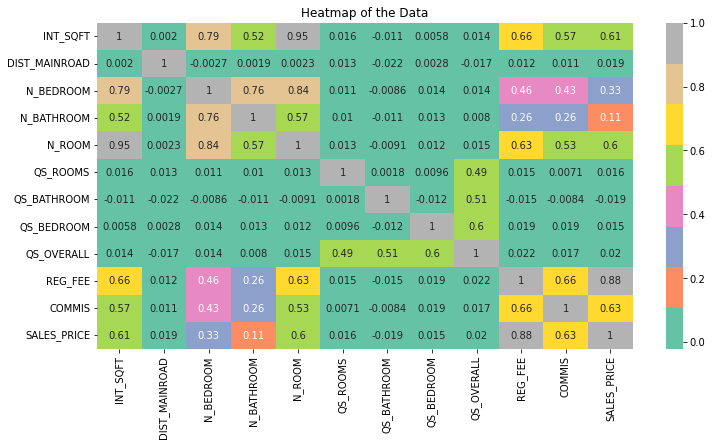

In [148]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2')
plt.title('Heatmap of the Data')
plt.show()

In [149]:
df_bk=df.copy()

In [ ]:
df.drop('')

In [150]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
classes=[]
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
        classes.append([col,le.classes_])

In [151]:
df.head()

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0    2266     4      1004        310            131          1           1   
1    6664     1      1986       1745             26          2           1   
2    1270     0       909        288             70          1           1   
3    3755     6      1855       1117             14          3           2   
4    4393     4      1226        442             84          1           1   

   N_ROOM  SALE_COND  PARK_FACIL  DATE_BUILD  BUILDTYPE  UTILITY_AVAIL  \
0       3          0           1        2731          0              0   
1       5          0           0        4226          0              0   
2       3          0           1        1511          0              1   
3       5          2           0        3300          2              3   
4       3          0           1        2406          2              0   

   STREET  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0       2       0         4            3           4       4.330   380000   
1       0       3         4            4           2       3.765   760122   
2       0       4         4            3           2       3.090   421094   
3       2       2         4            3           3       4.010   356321   
4       0       1         3            2           4       3.290   237000   

   COMMIS  SALES_PRICE  
0  144400      7600000  
1  304049     21717770  
2   92114     13159200  
3   77042      9630290  
4   74063      7406250

### Storing the Dependent and independant variables in x and y respectively.

In [152]:
x=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [153]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4976, 21), (2133, 21), (4976,), (2133,))

In [154]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [155]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

Empty DataFrame
Columns: [Model Name, Mean_Absolute_Error_MAE, Adj_R_Square, Root_Mean_Squared_Error_RMSE, Mean_Absolute_Percentage_Error_MAPE, Mean_Squared_Error_MSE, Root_Mean_Squared_Log_Error_RMSLE, R2_score]
Index: []

In [156]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1045116.865
Mean Squared Error (MSE): 1725465143166.445
Root Mean Squared Error (RMSE): 1313569.619
R2_score: 0.872767
Root Mean Squared Log Error (RMSLE): 14.088
Mean Absolute Percentage Error (MAPE): 10.26 %
Adj R Square:  0.87239
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 817125.682
Mean Squared Error (MSE): 1124088258022.972
Root Mean Squared Error (RMSE): 1060230.285
R2_score: 0.917112
Root Mean Squared Log Error (RMSLE): 13.874
Mean Absolute Percentage Error (MAPE): 8.28 %
Adj R Square:  0.916866
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 599550.333
Mean Squared Error (MSE): 568839123308.006
Root Mean Squared Error (RMSE): 754214.242
R2_score: 0.958055
Root Mean Squa

In [157]:
Results

Model Name  Mean_Absolute_Error_MAE  \
0                                 LinearRegression()             1.045117e+06   
1                            DecisionTreeRegressor()             8.171257e+05   
2  (DecisionTreeRegressor(max_features=1.0, rando...             5.995503e+05   
3                              KNeighborsRegressor()             1.271144e+06   
4  (ExtraTreeRegressor(random_state=2015104595), ...             3.943763e+05   
5  ([DecisionTreeRegressor(criterion='friedman_ms...             5.761389e+05   
6  XGBRegressor(base_score=0.5, booster='gbtree',...             3.924660e+05   

   Adj_R_Square  Root_Mean_Squared_Error_RMSE  \
0      0.872390                  1.313570e+06   
1      0.916866                  1.060230e+06   
2      0.957931                  7.542142e+05   
3      0.788132                  1.692561e+06   
4      0.981691                  4.975602e+05   
5      0.959138                  7.433134e+05   
6      0.980969                  5.072813e+05   

   Mean_Absolute_Percentage_Error_MAPE  Mean_Squared_Error_MSE  \
0                            10.256417            1.725465e+12   
1                             8.275840            1.124088e+12   
2                             6.078351            5.688391e+11   
3                            12.175605            2.864764e+12   
4                             4.052616            2.475662e+11   
5                             5.591816            5.525147e+11   
6                             3.910344            2.573343e+11   

   Root_Mean_Squared_Log_Error_RMSLE  R2_score  
0                          14.088259  0.872767  
1                          13.873997  0.917112  
2                          13.533432  0.958055  
3                          14.341753  0.788758  
4                          13.117472  0.981745  
5                          13.518873  0.959259  
6                          13.136821  0.981025

### From the above Results, the Top 3 Models by Comparing Adjacent R Square Values are

1. <b>ExtraTreesRegressor</b>         
2. <b>XGBRegressor</b>               
3. <b>GradientBoostingRegressor</b> 

* Training and Predicting with <b>ExtraTreesRegressor</b>

In [158]:
# Training the Model

modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [159]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [160]:
result[['PRT_ID','AREA','Price_actual','Price_pred']].sample(20)

PRT_ID        AREA  Price_actual   Price_pred
5239  P09030   Velachery      12204650  12053186.95
3135  P06472  Karapakkam       4158500   3997689.25
2446  P05321   Velachery      11667930  11341607.50
1372  P01154    Chormpet       8367250   8307300.25
1087  P03114   Velachery       8899780   8213241.90
2344  P09965   Velachery       7522430   7614154.20
4284  P01798  Karapakkam       6996125   7164187.00
3473  P08244    Chormpet       6633410   6460402.05
6442  P01191    Chormpet      10995190  10388552.50
6594  P04393  Karapakkam       8191250   8048665.95
5555  P09291    Chormpet       9512550   8963328.15
1328  P06786      TNagar      21050860  20821912.50
2619  P04138   Velachery      15825560  15758874.60
2534  P04114  Karapakkam       5589500   5904870.00
4603  P05333  Karapakkam       4926250   4529509.95
5763  P09051    Chormpet      12610500  11928842.00
5703  P03338  Karapakkam       8425000   7667190.70
734   P06943       Adyar      14116310  14442295.45
4509  P04541  Anna Nagar      13361380  12627449.85
5790  P06685    KK Nagar      10334640  10780031.50

In [161]:
px.scatter(result,x='Price_actual',y='Price_pred',trendline='ols',template='plotly_dark',title='<b> Actual Price  Vs  Predicted Price ')